In [91]:
from scipy.stats import norm
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
data=pd.read_csv("C:\\Users\\ozlem\\OneDrive\\Masaüstü\\kodluyoruz\\2.hafta\\titanik\\titanik\\hmelq.csv")
data.head()

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
0,0,81200,18834.0,108355.0,HomeImp,NaN,28.0,0.0,0.0,139.14,0.0,14.0,34.042
1,0,12600,103960.0,127384.0,DebtCon,NaN,2.0,0.0,0.0,129.02,0.0,25.0,34.479
2,0,18000,46865.0,61266.0,DebtCon,NaN,5.0,0.0,0.0,102.59,2.0,9.0,26.354
3,0,10300,57676.0,71027.0,DebtCon,NaN,19.0,0.0,0.0,157.52,1.0,11.0,33.992
4,0,9400,56508.0,78358.0,DebtCon,NaN,17.0,0.0,0.0,141.93,0.0,11.0,32.327


In [92]:
data=data.dropna()#içindeki nan değerlerini yok saydık.
data.head()


,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
153,0,18200,94727.0,136877.0,DebtCon,Mgr,15.0,0.0,0.0,168.96,2.0,26.0,36.056
154,0,21700,79240.0,96784.0,DebtCon,Mgr,5.0,0.0,0.0,64.51,6.0,24.0,38.079
155,0,34100,241931.0,36486.0,DebtCon,Mgr,1.0,0.0,2.0,196.01,3.0,50.0,42.459
156,0,8400,62989.0,76718.0,HomeImp,Mgr,3.0,0.0,2.0,131.47,0.0,22.0,29.200
157,0,17400,25859.0,43684.0,DebtCon,Mgr,16.0,1.0,0.0,95.36,1.0,17.0,27.108


In [93]:
data.isnull().values.any()#içinde nan değer varmı kontrol ediyor.

False

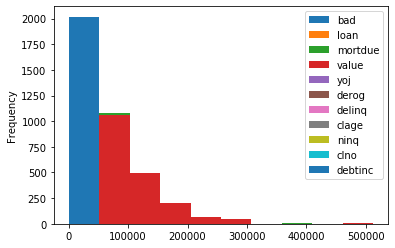

In [94]:
pd.DataFrame(data).plot.hist()
plt.show()

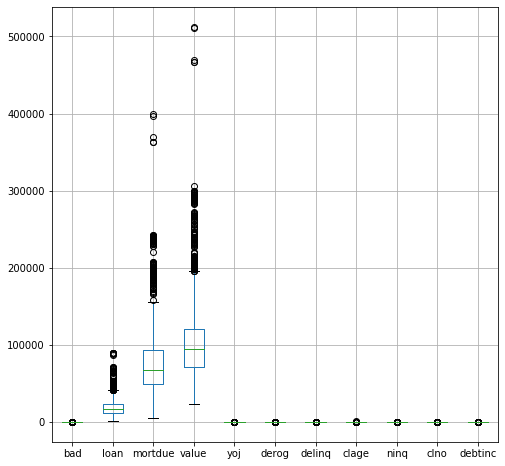

In [95]:
plt.figure(figsize = (8,8))
data.boxplot()
plt.show()

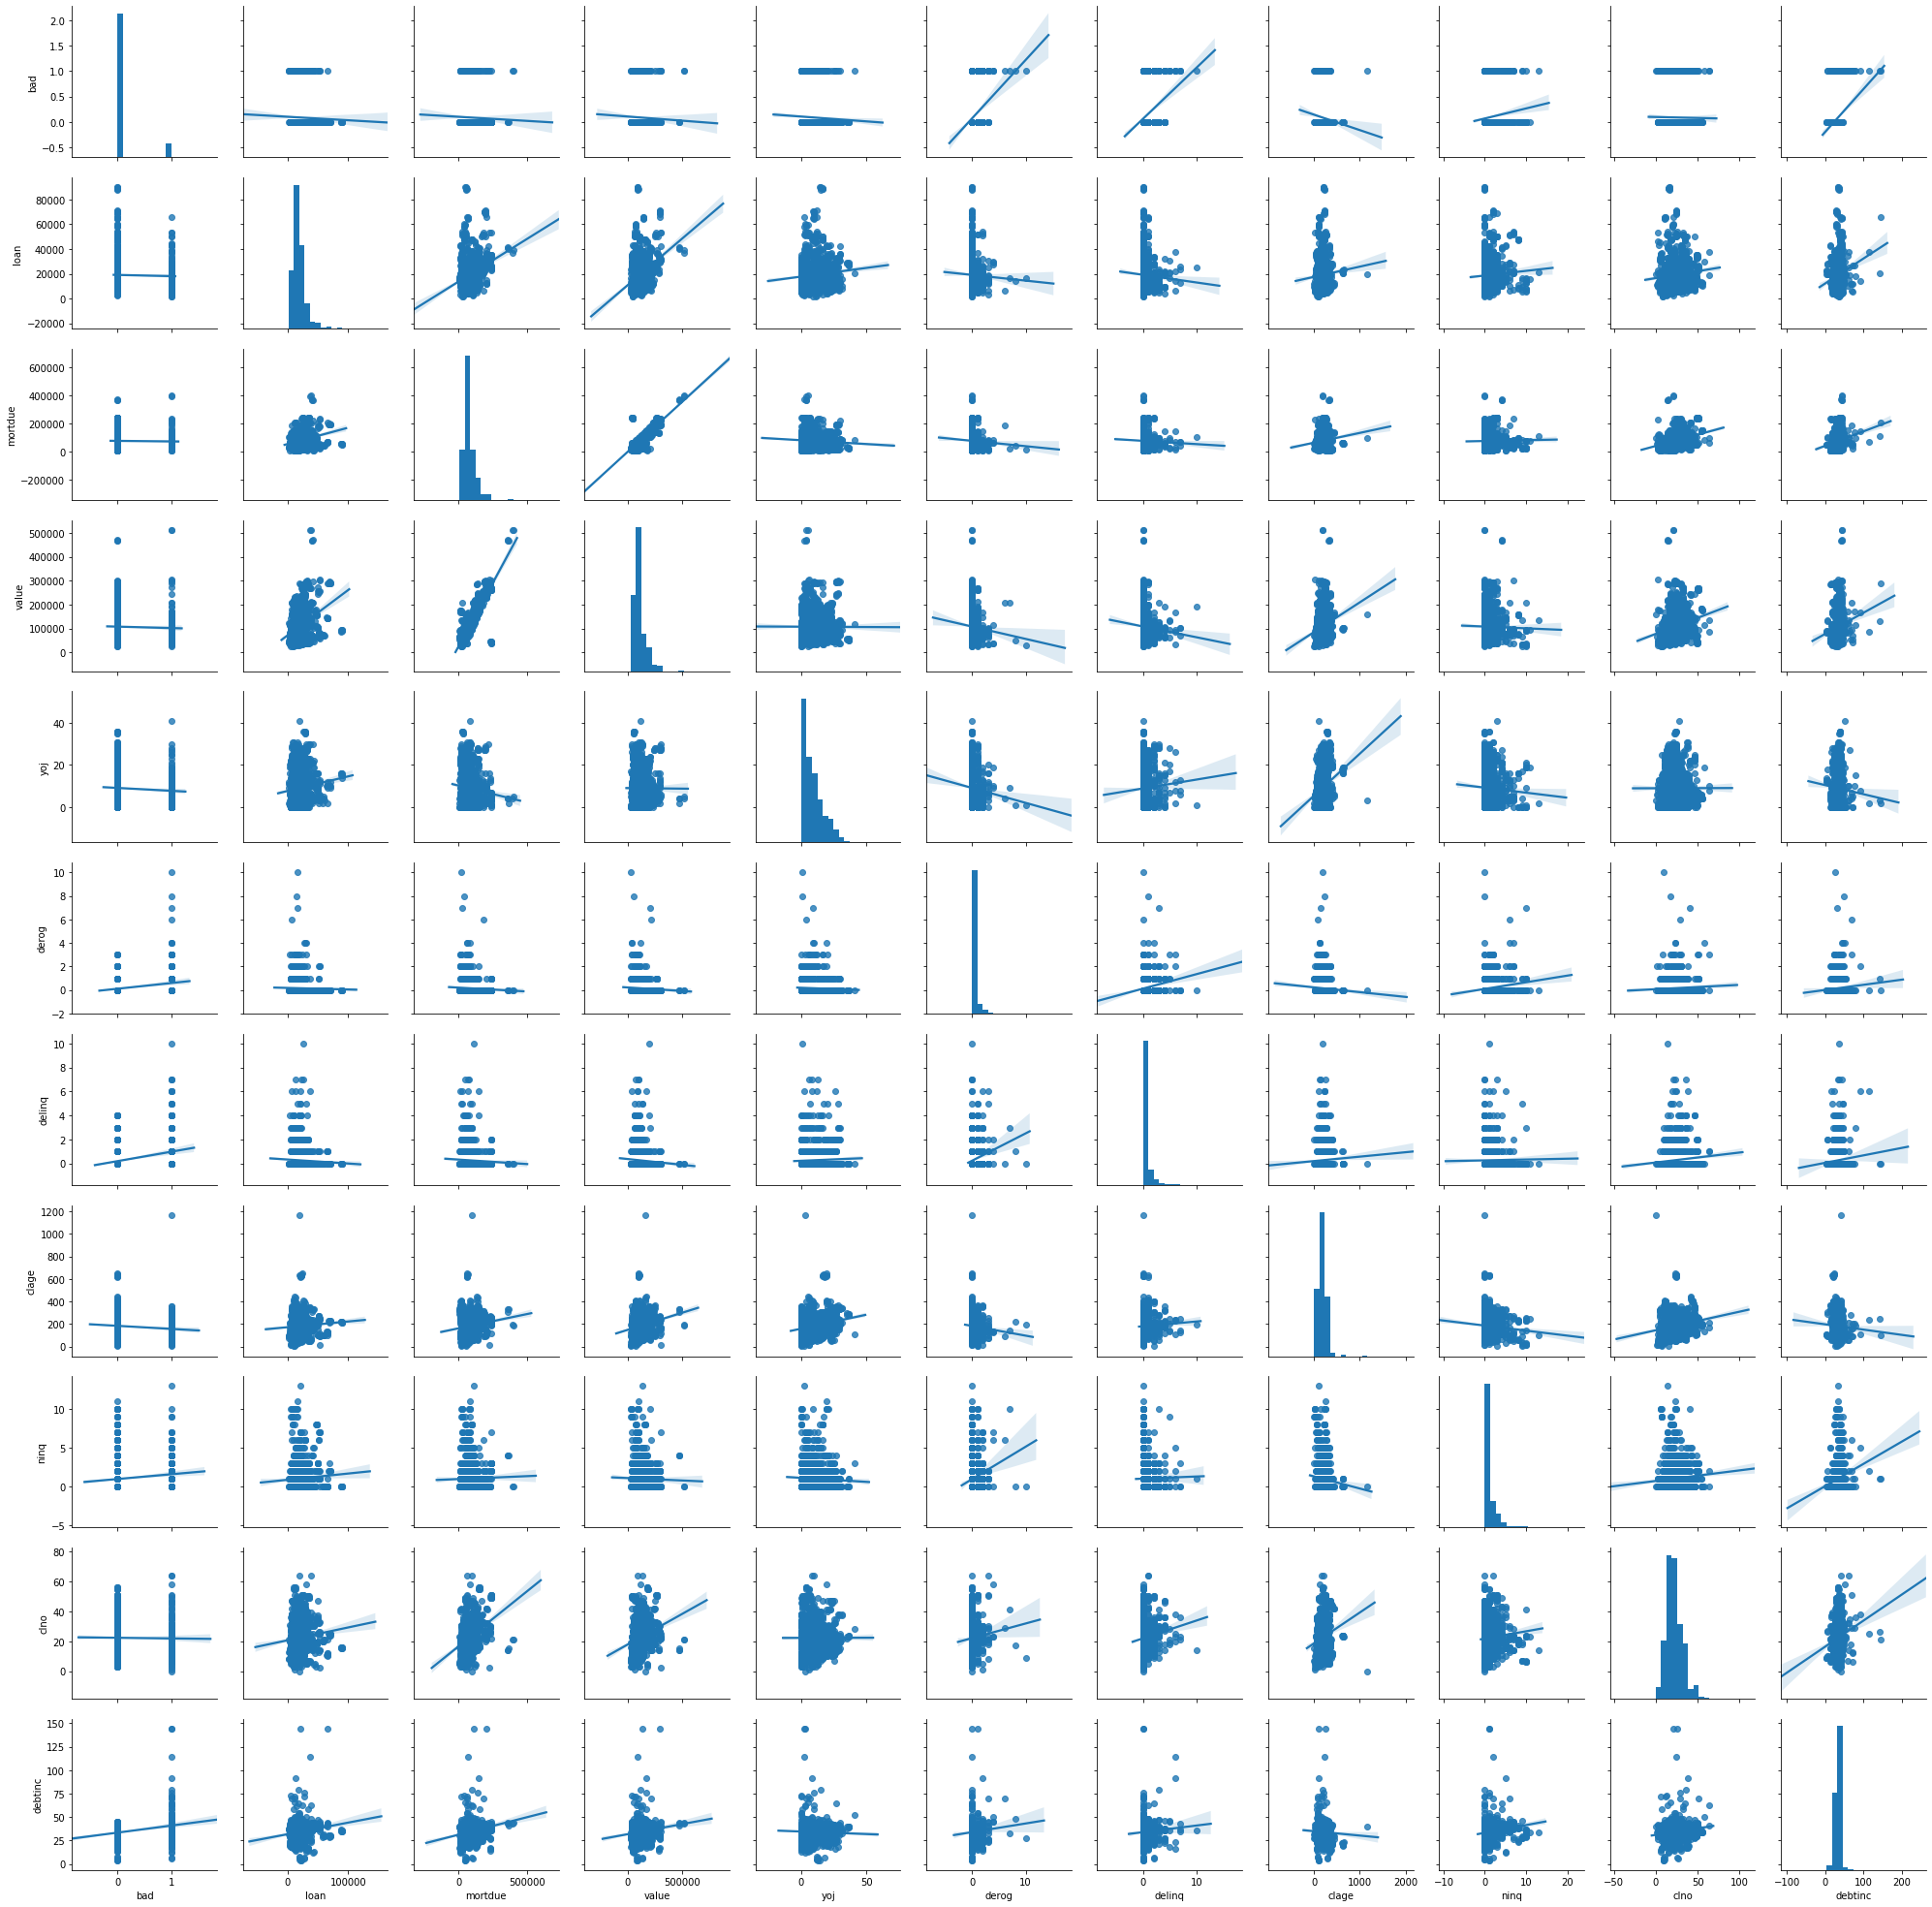

In [96]:
import seaborn as sns
sns.pairplot(data,kind="reg")#neredeyse hiçbiri normal dağılımdan gelmiyor.

In [97]:
veri=pd.crosstab(index=data["bad"],columns=data["delinq"])#delinq alanında en fazla kötü müşteri var
veri
veri.index=["kötü","iyi"]
veri

delinq,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,10.0
kötü,1595,163,57,18,7,0,0,0,0
iyi,114,24,15,7,6,4,4,3,1


In [98]:
veri=pd.crosstab(index=data["bad"],columns="count")
veri

col_0,count
bad,
0,1840
1,178


In [99]:
kotu_musteri=data["bad"]==1
iyi_musteri=data["bad"]==0

In [100]:
corr=data.corr()
corr

,bad,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc
bad,1.000000,-0.026184,-0.025103,-0.031318,-0.050937,0.235700,0.281008,-0.090830,0.109951,-0.012602,0.251064
loan,-0.026184,1.000000,0.282651,0.379027,0.098801,-0.024812,-0.045501,0.064738,0.054942,0.097961,0.157596
mortdue,-0.025103,0.282651,1.000000,0.867368,-0.092880,-0.049734,-0.041545,0.132383,0.020796,0.343742,0.194930
value,-0.031318,0.379027,0.867368,1.000000,-0.003837,-0.055510,-0.066153,0.194847,-0.021380,0.234563,0.138076
yoj,-0.050937,0.098801,-0.092880,-0.003837,1.000000,-0.054276,0.043922,0.222843,-0.049494,0.001370,-0.047849
derog,0.235700,-0.024812,-0.049734,-0.055510,-0.054276,1.000000,0.167600,-0.059206,0.153468,0.059943,0.063426
delinq,0.281008,-0.045501,-0.041545,-0.066153,0.043922,0.167600,1.000000,0.039487,0.013890,0.099542,0.066169
clage,-0.090830,0.064738,0.132383,0.194847,0.222843,-0.059206,0.039487,1.000000,-0.083368,0.184581,-0.046713
ninq,0.109951,0.054942,0.020796,-0.021380,-0.049494,0.153468,0.013890,-0.083368,1.000000,0.081600,0.152820
clno,-0.012602,0.097961,0.343742,0.234563,0.001370,0.059943,0.099542,0.184581,0.081600,1.000000,0.155147


In [101]:
data.drop(['reason','job'],inplace = True,axis = 1)

In [102]:
from scipy.stats import shapiro
grps=pd.unique(data.bad.values)
for i in data.columns :
    print(i+" için 0 ve 1 değerleri=")
    for a in grps:
        print(a,shapiro(data[i][data["bad"]==a]))
#pvalue değerlerim genellikle normal dağılımdan gelmemektedir ve H0 reject kabul edilir.

bad için 0 ve 1 değerleri=
0 (1.0, 1.0)
1 (1.0, 1.0)
loan için 0 ve 1 değerleri=
0 (0.8254581689834595, 7.618018971455436e-41)
1 (0.9042258858680725, 2.437214208228511e-09)
mortdue için 0 ve 1 değerleri=
0 (0.8761888742446899, 6.140487180178297e-36)
1 (0.7530112862586975, 5.364428532155343e-16)
value için 0 ve 1 değerleri=
0 (0.8567550182342529, 5.560680210281526e-38)
1 (0.7347071170806885, 1.3988843091622356e-16)
yoj için 0 ve 1 değerleri=
0 (0.9135879278182983, 3.7622141034931923e-31)
1 (0.8765063881874084, 6.26317955831901e-11)
derog için 0 ve 1 değerleri=
0 (0.29917919635772705, 0.0)
1 (0.47658318281173706, 1.05843499759195e-22)
delinq için 0 ve 1 değerleri=
0 (0.39022672176361084, 0.0)
1 (0.6200441122055054, 1.094538957462091e-19)
clage için 0 ve 1 değerleri=
0 (0.9341397285461426, 8.97556250532847e-28)
1 (0.6705604195594788, 2.030652096406175e-18)
ninq için 0 ve 1 değerleri=
0 (0.6654034852981567, 0.0)
1 (0.7402528524398804, 2.086744280806386e-16)
clno için 0 ve 1 değerleri=
0 (0

C:\Users\ozlem\Anaconda3\envs\tensorflow\lib\site-packages\scipy\stats\morestats.py:1650: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


In [106]:
from scipy.stats import levene
for j in data.columns:
    print(j+" için levene testi:")
    stat,p=stats.levene(data[j][iyi_musteri],data[j][kotu_musteri])
    print(stat,p)#equal variance test
    alpha=0.05
    if p >alpha:
        print('Orneklem Sabit varyansa(constant variance) sahiptir, ((Fail to reject H0))')  
    else:
        print('Orneklem Sabit varyansa(constant variance) sahip değildir, ((Reject H0))')


bad için levene testi:
nan nan
Orneklem Sabit varyansa(constant variance) sahip değildir, ((Reject H0))
loan için levene testi:
2.3947745891982195 0.12189825252399986
Orneklem Sabit varyansa(constant variance) sahiptir, ((Fail to reject H0))
mortdue için levene testi:
2.3073764505136856 0.12891801775903636
Orneklem Sabit varyansa(constant variance) sahiptir, ((Fail to reject H0))
value için levene testi:
3.9912413972700382 0.0458714974437462
Orneklem Sabit varyansa(constant variance) sahip değildir, ((Reject H0))
yoj için levene testi:
4.210113592213248 0.040312559874429624
Orneklem Sabit varyansa(constant variance) sahip değildir, ((Reject H0))
derog için levene testi:
118.58625318726504 7.1109894880631e-27
Orneklem Sabit varyansa(constant variance) sahip değildir, ((Reject H0))
delinq için levene testi:
172.843538986418 6.144156048310947e-38
Orneklem Sabit varyansa(constant variance) sahip değildir, ((Reject H0))
clage için levene testi:
0.008476501803127428 0.9266532240501075
Ornekl

In [104]:
from scipy.stats import f_oneway
for k in data.columns:
    print(k+" için ayrıstırıcı değer midir?:")
    stat,p=stats.levene(data[k][iyi_musteri],data[k][kotu_musteri])
    print(stat,p)

bad için ayrıstırıcı değer midir?:
nan nan
loan için ayrıstırıcı değer midir?:
2.3947745891982195 0.12189825252399986
mortdue için ayrıstırıcı değer midir?:
2.3073764505136856 0.12891801775903636
value için ayrıstırıcı değer midir?:
3.9912413972700382 0.0458714974437462
yoj için ayrıstırıcı değer midir?:
4.210113592213248 0.040312559874429624
derog için ayrıstırıcı değer midir?:
118.58625318726504 7.1109894880631e-27
delinq için ayrıstırıcı değer midir?:
172.843538986418 6.144156048310947e-38
clage için ayrıstırıcı değer midir?:
0.008476501803127428 0.9266532240501075
ninq için ayrıstırıcı değer midir?:
19.275276700348513 1.1901804304738905e-05
clno için ayrıstırıcı değer midir?:
9.247496740359477 0.002388546558601237
debtinc için ayrıstırıcı değer midir?:
115.70361829348167 2.8084956639802037e-26


In [105]:
#burada pvalue değerleri sıfıra yakın olanlar iyi musteri ve kotu musteriyi ayırmada etkilidir.
#Yani derog,delinq,ninq,debtinc değerler ayrıştırıcı değerlerdir.

In [108]:
stats.ttest_ind(data["derog"],data["delinq"],equal_var=False)

Ttest_indResult(statistic=-5.2236474481702055, pvalue=1.850981024305293e-07)

In [109]:
stats.ttest_ind(data["ninq"],data["debtinc"],equal_var=False)

Ttest_indResult(statistic=-173.03833794945467, pvalue=0.0)